In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO('/Users/apaula/Library/CloudStorage/GoogleDrive-elysiacristata@gmail.com/My Drive/datasets/runs/pose/train2/weights/best.pt')

# Predict with the model
results = model('/Users/apaula/src/SharkVideoAnalysis/tiles/frame_2_tile_14.jpg') 



image 1/1 /Users/apaula/src/SharkVideoAnalysis/tiles/frame_2_tile_14.jpg: 320x320 134 fishs, 33.3ms
Speed: 0.7ms preprocess, 33.3ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 320)


In [2]:
# Assuming 'results' is a list containing one 'Results' object as indicated
results_object = results[0]  # Access the first (and presumably only) Results object

# Access the keypoints from the Results object
keypoints = results_object.keypoints

# Now, let's safely access the keypoints data
if keypoints is not None:
    # The 'xy' attribute for coordinates, 'conf' for confidence scores
    # Convert tensor data to numpy arrays if necessary
    kp_xy = keypoints.xy.cpu().numpy()  # Coordinates of keypoints
    kp_conf = keypoints.conf.cpu().numpy()  # Confidence scores of keypoints


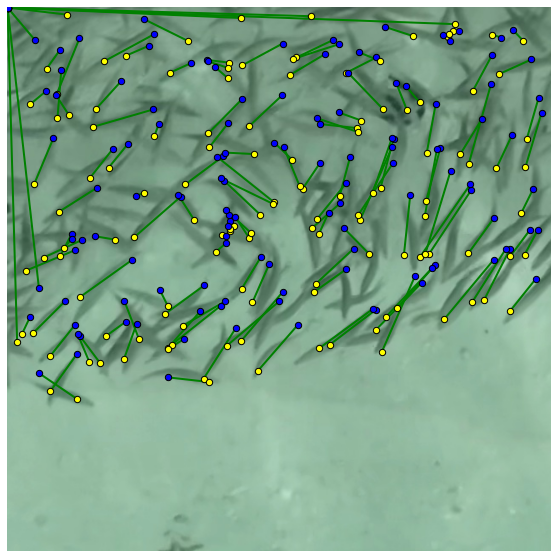

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
image_path = '/Users/apaula/src/SharkVideoAnalysis/tiles/frame_2_tile_14.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# kp_xy as provided, now iterating directly over it
# Assuming kp_xy is already available in your environment as shown

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Define colors for each point in the pair and for the connecting line
color_point1 = 'yellow'
color_point2 = 'blue'
color_line = 'green'

# Iterate over each pair of keypoints in kp_xy
for pair in kp_xy:
    point1, point2 = pair  # Unpack the pair of keypoints

    # Plot each point in the pair with different colors
    plt.scatter(point1[0], point1[1], c=color_point1, s=40, zorder=2, edgecolors='black')  # Add edge for visibility
    plt.scatter(point2[0], point2[1], c=color_point2, s=40, zorder=2, edgecolors='black')  # Add edge for visibility

    # Draw a line between the points in the pair
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color=color_line, linewidth=2, zorder=1)

plt.axis('off')
plt.show()
